### Least Squares Estimation

This technique is quick and straightforward. Its purpose is to find a line or model that minimizes the error in the sum of the squares of differences with the real data samples. In other words, the general polynomial regression model can be developed using the method of least squares. The method of least squares aims to minimize the variance between the values estimated from the polynomial and the expected values from the dataset. (A simple explanation can be found on this <a href="https://towardsdatascience.com/derivation-of-least-squares-regressor-and-classifier-708be1358fe9">link</a>.)

The coefficients of the polynomial regression model can be determined by solving the following system of linear equations.
<p>&nbsp;</p>

#### The Generalized Equation-




<a href="https://neutrium.net/mathematics/least-squares-fitting-of-a-polynomial/"><img src="https://assets.leetcode.com/users/images/dab2565e-c443-495e-a57c-c0d8cdff97eb_1695231154.1541696.png" width="80%" title="LSC" /></a>

<p>&nbsp;</p>

Reference: [LSC](https://neutrium.net/mathematics/least-squares-fitting-of-a-polynomial/)

Let's take an example to illustrate the Least Squares Classifier.

# Step 1: Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

# Step 2: Importing Dataset

In [ ]:
# This box is for running notebook locally. Uncomment following lines to use

# data = pd.read_csv('iris.csv')
# print(data)

In [ ]:
# This box is for running notebook on google collab

from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['iris.csv']))

Saving iris.csv to iris (2).csv


# Step 3: Data Visualization and Processing

In [ ]:
y = data['target']
x = data.drop('target', axis=1).astype(np.float64)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.3)
x_train.insert(4,"4",1) # Adding a bias term to the features
x_test.insert(4,"4",1)

lb = preprocessing.LabelBinarizer() # To convert class name to numerical data (one-hot encoding of target labels)
y_train = lb.fit_transform(y_train)

# Step 4: Model Fitting

## Solving the Least Squares equation to get the weights

Equation -

<a href="https://neutrium.net/mathematics/least-squares-fitting-of-a-polynomial/"><img src="https://assets.leetcode.com/users/images/c22d719d-b335-4327-8a2d-ab3865d5d3d5_1695238858.6975925.png" width="40%" title="LSC" /></a>



In [ ]:
# The above equation can be implemented in the following manner:
w1 = x_train.T.dot(y_train).T
w2 = np.linalg.inv(x_train.T.dot(x_train))

# w1 represents a vector where each element corresponds to the weighted sum of all training examples' features
# with respect to their target labels. In other words, it captures how much each feature contributes to
# the prediction of the target labels.

# w2 represents a matrix that is used to normalize the contributions of each feature. It helps to ensure that
# features with different scales do not dominate the weight calculations. By taking the inverse of
# the dot product of the transposed features with themselves, you effectively account for the relationships
# between different features and their variances.


weights = w1.dot(w2)
weights

# These coefficients are chosen to minimize the squared error between the predicted values (based on
# the input features and these weights) and the actual target labels. The dot product combines
# the information from both w1 and w2, effectively tuning the importance of each feature while considering
# their relationships and variances.

,0,1,2,3,4
0,0.016411,0.317862,-0.187941,-0.087426,0.079865
1,0.078830,-0.582180,0.163378,-0.479791,1.595614
2,-0.095241,0.264318,0.024563,0.567217,-0.675480


# Step 5: Model Evaluation

In [ ]:

y_pred = []
maximum = -2

# To predict the class of a given test sample, we take the dot product of the
# sample with the weights matrix and assign the class with the maximum value in the
# resultant matrix as the predicted class.

# To implement this approach in code, we can do the following:
# For each sample in x_test, we calculate the value with all the classes' weights
# by taking the dot products.
# And then, predict the class with the maximum score as the predicted class of that particular sample.

for index, x in x_test.iterrows():
    for idx,w in weights.iterrows():
        a = np.array(x).flatten()
        b = np.array(w).flatten()
        s = a.dot(b)
        if(s > maximum):
            maximum = s
            ind = idx
    maximum = -2
    y_pred.append(ind)
    ind = 0

y_pred = lb.fit_transform(y_pred)
y_test = lb.fit_transform(y_test)
# y_pred and y_test take the transformed values from [1, 0, 0], [0, 1, 0], and [0, 0, 1]
# for the orginal target labels "Iris-setosa", "Iris-versicolor", and "Iris-virginica", respectively.

## Accuracy Calculation

In [ ]:
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_pred,y_test)}")

Accuracy: 0.7111111111111111


## Confusion Matrix

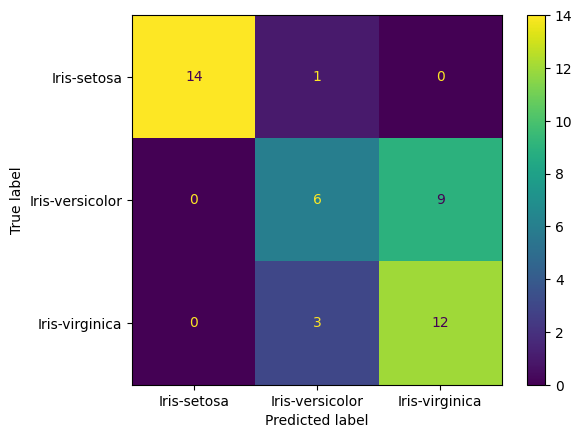

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
)

y_test_non_category = [ np.argmax(t) for t in y_test ]
y_predict_non_category = [ np.argmax(t) for t in y_pred ]

labels = lb.classes_
cm = confusion_matrix(y_test_non_category, y_predict_non_category)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

## Test Sample

In [ ]:
sample_point = np.array([5.1, 3.5, 1.4, 0.2, 1])  # Adding a bias term (1) as the 5th feature
maximum = -2
ind = 0

for idx, w in weights.iterrows():
    a = sample_point.flatten()
    b = np.array(w).flatten()
    s = a.dot(b)
    if s > maximum:
        maximum = s
        ind = idx

predicted_class = lb.fit_transform([ind])[0]
print(f"Predicted Class: {predicted_class}") # Class 0: Iris-setosa

Predicted Class: [0]
